# Namespace Affinity

Here we are trying to show that the performance of a local namespace is better than if the namespace is remote.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
%matplotlib inline

[277.979051, 278.426467, 284.821252] [270.07863, 279.146904, 270.032395]


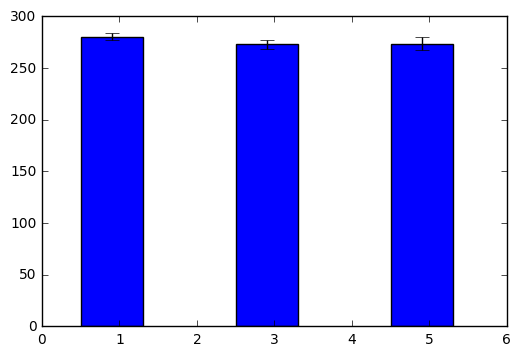

In [34]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

def deltas(files):
    r = []
    for f in files:
        with open(f) as data_file:    
            data = json.load(data_file)
            r.append(to_seconds(data['delta']))
    return r

mds0 = deltas(glob.glob('creates/results/mdtest-issdm-12*'))
mds1 = deltas(glob.glob('creates/results/mdtest-issdm-15*'))
mds2 = deltas(glob.glob('creates/results/mdtest-issdm-18*'))

fig, ax = plt.subplots()
ax.bar([0.5, 2.5, 4.5],
       [np.mean(mds0), np.mean(mds1), np.mean(mds2)],
       yerr=[np.std(mds0), np.std(mds1), np.std(mds2)],
       color='blue', ecolor='black', capsize=5)

print mds0, mds1

[364.713, 364.009, 355.611] [375.409, 363.279, 375.7]


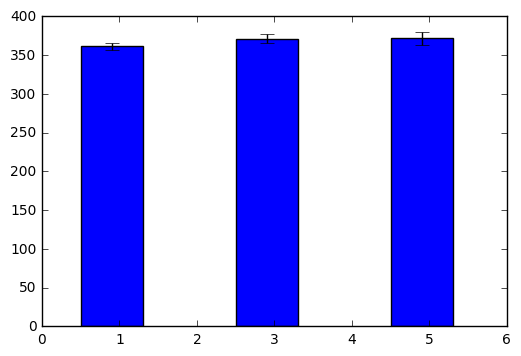

In [9]:
def throughput(files):
    r = []
    for f in files:
        with open(f) as data_file:    
            data = json.load(data_file)
            for line in data['stdout_lines']:
                if "File creation" in line:
                    mean = line.split()[5]
            r.append(float(mean))
    return r

mds0 = throughput(glob.glob('creates/results/mdtest-issdm-12*'))
mds1 = throughput(glob.glob('creates/results/mdtest-issdm-15*'))
mds2 = throughput(glob.glob('creates/results/mdtest-issdm-18*'))

fig, ax = plt.subplots()
ax.bar([0.5, 2.5, 4.5],
       [np.mean(mds0), np.mean(mds1), np.mean(mds2)],
       yerr=[np.std(mds0), np.std(mds1), np.std(mds2)],
       color='blue', ecolor='black', capsize=5)

print mds0, mds1, mds2

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

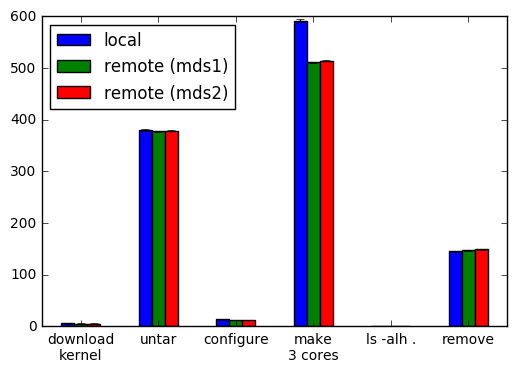

In [143]:
def run_mean(files):
    i = 0
    rt = pd.DataFrame()
    for fname in files:
        with open(fname) as f:
            df = pd.read_csv(f)
            rt['run' + str(i)] = df['delta'].apply(to_seconds)
            i = i + 1
    return rt.mean(axis=1), rt.std(axis=1)
 
means = pd.DataFrame()
stds = pd.DataFrame()
means['local'], stds['local'] = run_mean(glob.glob('compile/results/compile-issdm-12*'))
means['remote (mds1)'], stds['remote (mds1)'] = run_mean(glob.glob('compile/results/compile-issdm-15*'))
means['remote (mds2)'], stds['remote (mds2)'] = run_mean(glob.glob('compile/results/compile-issdm-18*'))

plt.figure()
ax = means.plot.bar(yerr=stds)
ax.set_xticklabels(["download\nkernel", "untar", "configure", "make\n3 cores", "ls -alh .", "remove"])
plt.xticks(rotation=0)